In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [2]:
df = pd.read_csv("../data/sales_data.csv")
df["Date"] = pd.to_datetime(df["Date"])
df.head()

,Date,Product,Category,Region,Revenue,Units_Sold
0,2023-03-29,Shoes,Clothing,Zurich,742,2
1,2023-02-28,Laptop,Electronics,Geneva,437,14
2,2023-01-10,Laptop,Clothing,Bern,706,7
3,2023-03-21,Phone,Clothing,Geneva,224,4
4,2023-02-18,Shirt,Clothing,Bern,551,5


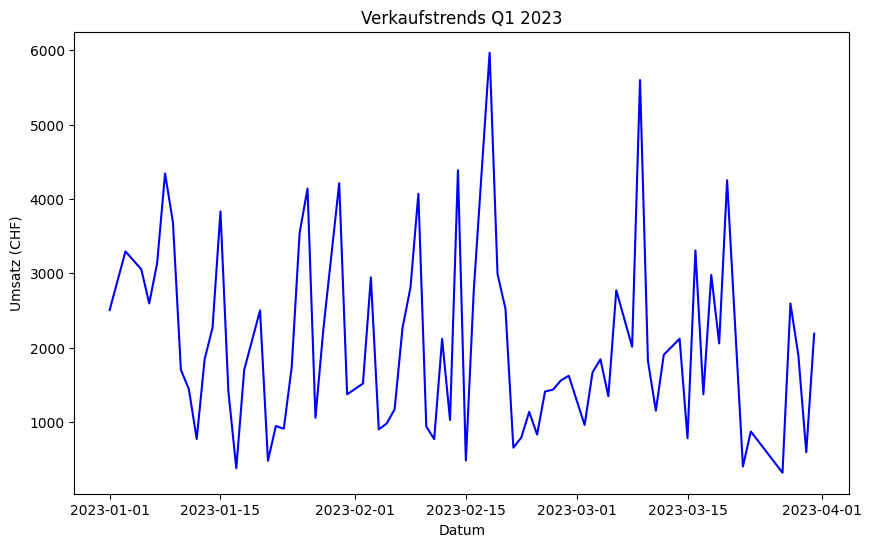

In [3]:
sales_by_date = df.groupby("Date")["Revenue"].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(sales_by_date["Date"], sales_by_date["Revenue"], color="blue")
plt.title("Verkaufstrends Q1 2023")
plt.xlabel("Datum")
plt.ylabel("Umsatz (CHF)")
plt.savefig("../visualizations/sales_trends.png")
plt.show()

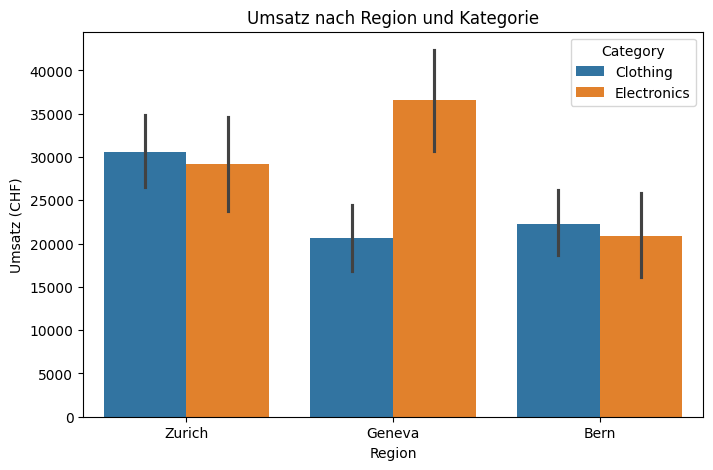

In [4]:
plt.figure(figsize=(8, 5))
sns.barplot(x="Region", y="Revenue", hue="Category", data=df, estimator=sum)
plt.title("Umsatz nach Region und Kategorie")
plt.ylabel("Umsatz (CHF)")
plt.savefig("../visualizations/revenue_by_region.png")
plt.show()